In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [32]:
data = pd.read_csv('/content/NSE.csv')

In [33]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [34]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [35]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [36]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [37]:
df.reset_index(inplace=True)

In [38]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1,1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2,1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
3,1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
4,1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


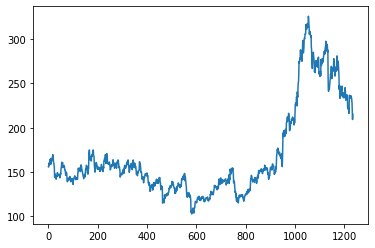

In [39]:
plt.plot(df['Close'])

In [40]:
df1=df['Close']

In [41]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

In [42]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

In [43]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [44]:
training_size,test_size

(864, 371)

In [45]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [46]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [47]:
print(X_train.shape), print(y_train.shape)

(763, 100)
(763,)


(None, None)

In [48]:
print(X_test.shape), print(ytest.shape)

(270, 100)
(270,)


(None, None)

In [49]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [51]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
11/11 [==============================] - 9s 305ms/step - loss: 0.0083 - val_loss: 0.0016
Epoch 2/60
11/11 [==============================] - 2s 177ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 3/60
11/11 [==============================] - 2s 177ms/step - loss: 0.0019 - val_loss: 8.4894e-04
Epoch 4/60
11/11 [==============================] - 2s 177ms/step - loss: 0.0013 - val_loss: 6.3487e-04
Epoch 5/60
11/11 [==============================] - 2s 177ms/step - loss: 0.0011 - val_loss: 6.0620e-04
Epoch 6/60
11/11 [==============================] - 2s 175ms/step - loss: 0.0010 - val_loss: 7.5412e-04
Epoch 7/60
11/11 [==============================] - 2s 175ms/step - loss: 9.8223e-04 - val_loss: 7.0836e-04
Epoch 8/60
11/11 [==============================] - 2s 174ms/step - loss: 9.3278e-04 - val_loss: 8.1339e-04
Epoch 9/60
11/11 [==============================] - 2s 173ms/step - loss: 9.6668e-04 - val_loss: 9.1586e-04
Epoch 10/60
11/11 [==============================] - 2s 176m

In [53]:
test_predict=model.predict(X_test)

In [54]:
test_predict1=scaler.inverse_transform(test_predict)

In [55]:
test_predict1

array([[0.38526633],
       [0.38694406],
       [0.39714602],
       [0.41177335],
       [0.42684084],
       [0.44072556],
       [0.4533425 ],
       [0.4581995 ],
       [0.46067736],
       [0.46033362],
       [0.46067682],
       [0.46429038],
       [0.46697408],
       [0.4665415 ],
       [0.45396984],
       [0.43210042],
       [0.4171416 ],
       [0.40642223],
       [0.4044789 ],
       [0.41146243],
       [0.42349198],
       [0.43472528],
       [0.44672984],
       [0.45729008],
       [0.46340382],
       [0.46522045],
       [0.46478283],
       [0.46549565],
       [0.4653443 ],
       [0.4636323 ],
       [0.46170712],
       [0.4569362 ],
       [0.44914797],
       [0.43989304],
       [0.43784696],
       [0.43788758],
       [0.4427161 ],
       [0.45959055],
       [0.48723647],
       [0.51554173],
       [0.5372758 ],
       [0.54736185],
       [0.5459888 ],
       [0.54689336],
       [0.54013956],
       [0.5283091 ],
       [0.5320096 ],
       [0.541

In [56]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,test_predict))

0.05669568201597894